In [1]:
import numpy as np
import librosa
import matplotlib
import pandas as pd

print(f"Numpy version: {np.__version__}")
print(f"Librosa version: {librosa.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Pandas version: {pd.__version__}")


Numpy version: 1.26.4
Librosa version: 0.10.2.post1
Matplotlib version: 3.10.0
Pandas version: 2.2.3


In [2]:
audio_prueba = 'data/MEMD_audio/2.mp3'
audio_prueba

'data/MEMD_audio/2.mp3'

Le pedimos a Chatgpt que nos haga una pequeña demostración de qué información podemos sacar para un audio

In [22]:
try:
    # Cargar el archivo de audio
    y, sr = librosa.load(audio_prueba, sr=None)
    print(f"Audio cargado correctamente. Duración: {len(y)/sr:.2f} segundos, Frecuencia de muestreo: {sr} Hz")

    # **1. Características básicas**
    duration = librosa.get_duration(y=y, sr=sr)  # Duración
    rms = librosa.feature.rms(y=y).mean()  # Energía (RMS)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)  # Tempo estimado
    zero_crossings = librosa.feature.zero_crossing_rate(y=y).mean()  # Tasa de cruces por cero

    # **2. MFCCs**
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = mfccs.mean(axis=1)  # Promedio de cada coeficiente MFCC

    # **3. Espectral**
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()  # Centroid espectral
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()  # Ancho de banda espectral
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()  # Rolloff espectral

    # **4. Chroma**
    chroma = librosa.feature.chroma_stft(y=y, sr=sr).mean(axis=1)  # Promedio de cromagramas

    # **5. Consolidar características**
    audio_features = {
        "file_name": audio_prueba,
        "duration": duration,
        "rms_energy": rms,
        "tempo": tempo,
        "zero_crossing_rate": zero_crossings,
        "spectral_centroid": spectral_centroid,
        "spectral_bandwidth": spectral_bandwidth,
        "spectral_rolloff": spectral_rolloff,
        **{f"mfcc_{i+1}": mfcc for i, mfcc in enumerate(mfccs_mean)},
        **{f"chroma_{i+1}": chroma_val for i, chroma_val in enumerate(chroma)},
    }

    # Mostrar las características en formato DataFrame
    df_features = pd.DataFrame([audio_features])
    # print(df_features.T)

except Exception as e:
    print(f"Error al procesar el archivo {audio_prueba}: {e}")


Audio cargado correctamente. Duración: 45.06 segundos, Frecuencia de muestreo: 44100 Hz


In [23]:
y

array([0.        , 0.        , 0.        , ..., 0.3946326 , 0.41406155,
       0.33967352], dtype=float32)

In [24]:
sr

44100

In [21]:
df_features.T

,0
file_name,data/MEMD_audio/2.mp3
duration,45.060998
rms_energy,0.105231
tempo,[139.6748310810811]
zero_crossing_rate,0.036522
spectral_centroid,1894.684236
spectral_bandwidth,2486.199436
spectral_rolloff,3912.602977
mfcc_1,-200.259857
mfcc_2,171.772614


### **Explicación**:

#### **Características Básicas**
1. **`file_name`**:
   - Nombre o ruta del archivo de audio analizado.
   - en este caso, es el archivo `2.mp3`.

2. **`duration`**:
   - Duracion total del archivo de audio en segundos.
   - tiempo: **45.06 segundos**.

3. **`rms_energy`**:
   - energía RMS (Root Mean Square) mide la intensidad promedio del sonido en el tiempo. Se calcula como la raíz cuadrada del promedio de los cuadrados de las amplitudes de la señal.
   - Un valor más alto indica un sonido más fuerte.

4. **`tempo`**:
   - Velocidad del ritmo del audio, expresada en Beats Per Minute (BPM).
   - Valor: **139.67 BPM**, ritmo moderado/rápido.

5. **`zero_crossing_rate`**:
   - Frecuencia con la que la señal de audio cruza el eje cero.
   - Distingue entre sonidos suaves y ruidosos; un valor bajo indica un sonido más suave.


#### **Características Espectrales**
6. **`spectral_centroid`**:
   - Representa el "centro de gravedad" del espectro de frecuencias.
   - Un valor más alto indica un sonido con más frecuencias altas.

7. **`spectral_bandwidth`**:
   - Rango de frecuencias alrededor del centroid espectral.
   - uu valor mayor implica un sonido más complejo o brillante.

8. **`spectral_rolloff`**:
   - Frecuencia por debajo de la cual se concentra el 85% de la energía del espectro.
   - identifica si un sonido es "grave" o "agudo".


#### **MFCCs (Mel Frequency Cepstral Coefficients)**
9. **`mfcc_1` a `mfcc_13`**:
   - Son coeficientes que describen la forma del espectro en la escala de [Mel](https://www.toolify.ai/es/ai-news-es/explicacin-fcil-de-los-espectrogramas-de-mel-2795298).
   - Se utilizan para representar características de timbre:
     - Los primeros coeficientes capturan información general (frecuencias bajas).
     - Los coeficientes más altos capturan detalles más finos.


#### **Chroma Features**
10. **`chroma_1` a `chroma_12`**:
    - Representan la intensidad de cada una de las 12 notas musicales en una octava (C, C#, D, ..., B).
    - Permiten analizar el contenido armónico y tonal del audio.


---
vamos a visualizar algunos graficos sobre el audio

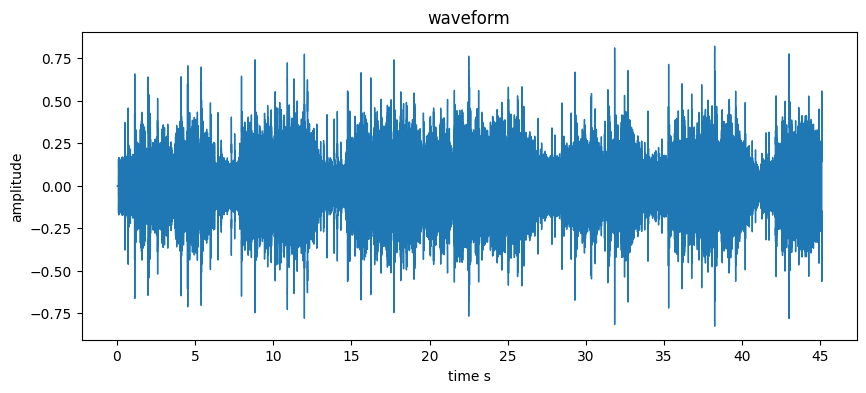

In [26]:
import matplotlib.pyplot as plt
# Forma de onda
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('waveform')
plt.xlabel('time s')
plt.ylabel('amplitude')
plt.show()

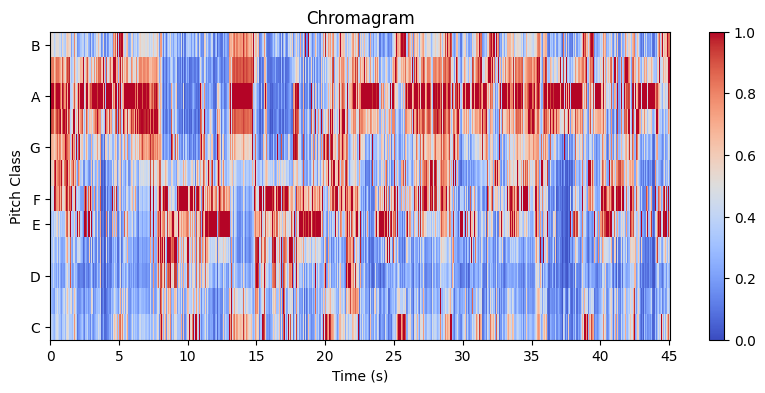

In [28]:
# Cromagrama
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', sr=sr, cmap='coolwarm')
plt.colorbar()
plt.title('Chromagram')
plt.xlabel('Time (s)')
plt.ylabel('Pitch Class')
plt.show()


---

Aplicamos todo lo aprendido de forma general para todos los archivos de la carpeta `MEMD_audio`

In [4]:
valence_df = pd.read_csv("data/valence_arousal/valence.csv")
arousal_df = pd.read_csv("data/valence_arousal/arousal.csv")

In [9]:
unique_song_ids_v = valence_df['song_id'].unique().tolist()
print(unique_song_ids_v)
print(len(unique_song_ids_v))

[2, 3, 4, 5, 7, 8, 10, 12, 13, 17, 18, 19, 20, 21, 22, 24, 25, 31, 32, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 62, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 140, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 250, 

In [10]:
unique_song_ids_a = arousal_df['song_id'].unique().tolist()
print(unique_song_ids_a)
print(len(unique_song_ids_a))

[2, 3, 4, 5, 7, 8, 10, 12, 13, 17, 18, 19, 20, 21, 22, 24, 25, 31, 32, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 62, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 140, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 250, 

In [12]:
unique_song_ids_a == unique_song_ids_v

True

In [17]:
audio_files = {f"audio_{num}": f"data/MEMD_audio/{num}.mp3" for num in unique_song_ids_a}
print(len(audio_files))
audio_files

1802


{'audio_2': 'data/MEMD_audio/2.mp3',
 'audio_3': 'data/MEMD_audio/3.mp3',
 'audio_4': 'data/MEMD_audio/4.mp3',
 'audio_5': 'data/MEMD_audio/5.mp3',
 'audio_7': 'data/MEMD_audio/7.mp3',
 'audio_8': 'data/MEMD_audio/8.mp3',
 'audio_10': 'data/MEMD_audio/10.mp3',
 'audio_12': 'data/MEMD_audio/12.mp3',
 'audio_13': 'data/MEMD_audio/13.mp3',
 'audio_17': 'data/MEMD_audio/17.mp3',
 'audio_18': 'data/MEMD_audio/18.mp3',
 'audio_19': 'data/MEMD_audio/19.mp3',
 'audio_20': 'data/MEMD_audio/20.mp3',
 'audio_21': 'data/MEMD_audio/21.mp3',
 'audio_22': 'data/MEMD_audio/22.mp3',
 'audio_24': 'data/MEMD_audio/24.mp3',
 'audio_25': 'data/MEMD_audio/25.mp3',
 'audio_31': 'data/MEMD_audio/31.mp3',
 'audio_32': 'data/MEMD_audio/32.mp3',
 'audio_35': 'data/MEMD_audio/35.mp3',
 'audio_37': 'data/MEMD_audio/37.mp3',
 'audio_39': 'data/MEMD_audio/39.mp3',
 'audio_40': 'data/MEMD_audio/40.mp3',
 'audio_41': 'data/MEMD_audio/41.mp3',
 'audio_42': 'data/MEMD_audio/42.mp3',
 'audio_43': 'data/MEMD_audio/43.mp3'